In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 74, 74, 32)       128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 74, 74, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                      

Epoch 1/5
251/251 [==============================] - 601s 2s/step - loss: 0.8480 - accuracy: 0.6231 - val_loss: 0.8365 - val_accuracy: 0.5037
Epoch 2/5
251/251 [==============================] - 448s 2s/step - loss: 0.6175 - accuracy: 0.6954 - val_loss: 0.6323 - val_accuracy: 0.6683
Epoch 3/5
251/251 [==============================] - 247s 983ms/step - loss: 0.5330 - accuracy: 0.7327 - val_loss: 0.4905 - val_accuracy: 0.7677
Epoch 4/5
251/251 [==============================] - 232s 923ms/step - loss: 0.4921 - accuracy: 0.7603 - val_loss: 0.4609 - val_accuracy: 0.7672
Epoch 5/5
251/251 [==============================] - 238s 946ms/step - loss: 0.4527 - accuracy: 0.7929 - val_loss: 0.6980 - val_accuracy: 0.6836


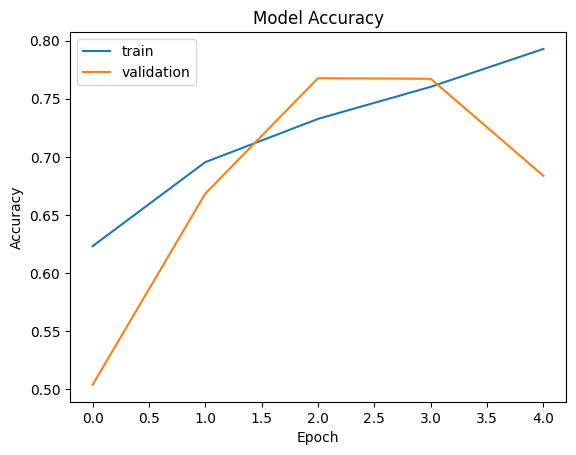

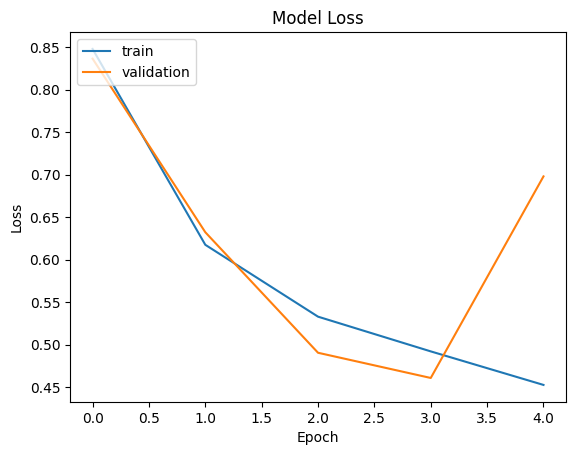

In [ ]:
Train_data = "training_set"
Test_data = "test_set"
IMG_SIZE = 150
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        Train_data,
        target_size=(IMG_SIZE, IMG_SIZE),
        batch_size=BATCH_SIZE,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        Test_data,
        target_size=(IMG_SIZE, IMG_SIZE),
        batch_size=BATCH_SIZE,
        class_mode='binary')

train_data = train_generator
test_data = validation_generator

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(2,2),
    BatchNormalization(),
    Dropout(0.2),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    BatchNormalization(),
    Dropout(0.2),
    
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    BatchNormalization(),
    Dropout(0.2),
    
    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    
     Dense(1, activation='sigmoid')
])


model.summary()


model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=0.0001),
              metrics=['accuracy'])


history = model.fit(train_data,
                    steps_per_epoch=len(train_data),
                    epochs=5,
                    validation_data=test_data,
                    validation_steps=len(test_data),
                    verbose=1)

model.save("cat_dog_classifier.h5")


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

loaded_model = tf.keras.models.load_model('cat_dog_classifier.h5')

test_images = []
test_labels = []
for image_batch, label_batch in test_data:
    for img, label in zip(image_batch, label_batch):
        test_images.append(img)
        test_labels.append(label)
test_images = np.array(test_images)
test_labels = np.array(test_labels)
test_predictions = loaded_model.predict(test_images)


with open('submission.csv', 'w') as file:
    writer = csv.writer(file)
    writer.writerow(["Id", "Predicted"])
    for i in range(len(test_predictions)):
        if test_predictions[i][0] > 0.5:
            writer.writerow([i+1, "Dog"])
        else:
            writer.writerow([i+1, "Cat"])